In [1]:
from copy import deepcopy

import ARESlatticeStage3v1_9 as ares
import matplotlib.pyplot as plt
import numpy as np
import ocelot as oc
from ocelot.adaptors.astra2ocelot import astraBeam2particleArray
from ocelot.gui.accelerator import show_density, show_e_beam

/opt/homebrew/Caskroom/miniforge/base/envs/cheetah-demos/lib/python3.9/site-packages/ocelot/cpbd/beam.py:1567: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  slice_analysis = slice_analysis_py if not nb_flag else nb.jit(slice_analysis_py)
/opt/homebrew/Caskroom/miniforge/base/envs/cheetah-demos/lib/python3.9/site-packages/ocelot/cpbd/tm_utils.py:153: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behavi

initializing ocelot...
import: module PYFFTW is not installed. Install it to speed up calculation


/opt/homebrew/Caskroom/miniforge/base/envs/cheetah-demos/lib/python3.9/site-packages/ocelot/cpbd/wake3D.py:80: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  project_on_grid = project_on_grid_py if not nb_flag else nb.jit(project_on_grid_py)


### Load the lattice


In [2]:
ares.areamqzm1.k1 = 10.0
ares.areamqzm2.k1 = -9.0
ares.areamcvm1.angle = 1e-3
ares.areamqzm3.k1 = -8.0
ares.areamchm1.angle = -2e-3

lattice = oc.MagneticLattice(ares.cell, start=ares.areasola1, stop=ares.areabscr1)
lattice

### Load the particle distribution


In [3]:
p_array = astraBeam2particleArray("ACHIP_EA1_2021.1351.001")

Astra to Ocelot: charge =  5.000000000001694e-13  C
Astra to Ocelot: particles number =  100000
Astra to Ocelot: energy =  0.10731590244355117  GeV
Astra to Ocelot: s pos =  13.50890653269  m


### Benchmark

We start with Ocelot in its fastest setup and without getting screen data


In [4]:
%%timeit
navi = oc.Navigator(lattice)
# navi.unit_step = lattice.totalLen
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi, print_progress=False)

182 ms ± 31.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%%timeit
navi = oc.Navigator(lattice)
navi.unit_step = lattice.totalLen
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi, print_progress=False)

174 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
navi = oc.Navigator(lattice)
navi.unit_step = lattice.totalLen
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi)

z = 2.0460399999999996 / 2.0460399999999996. Applied:  

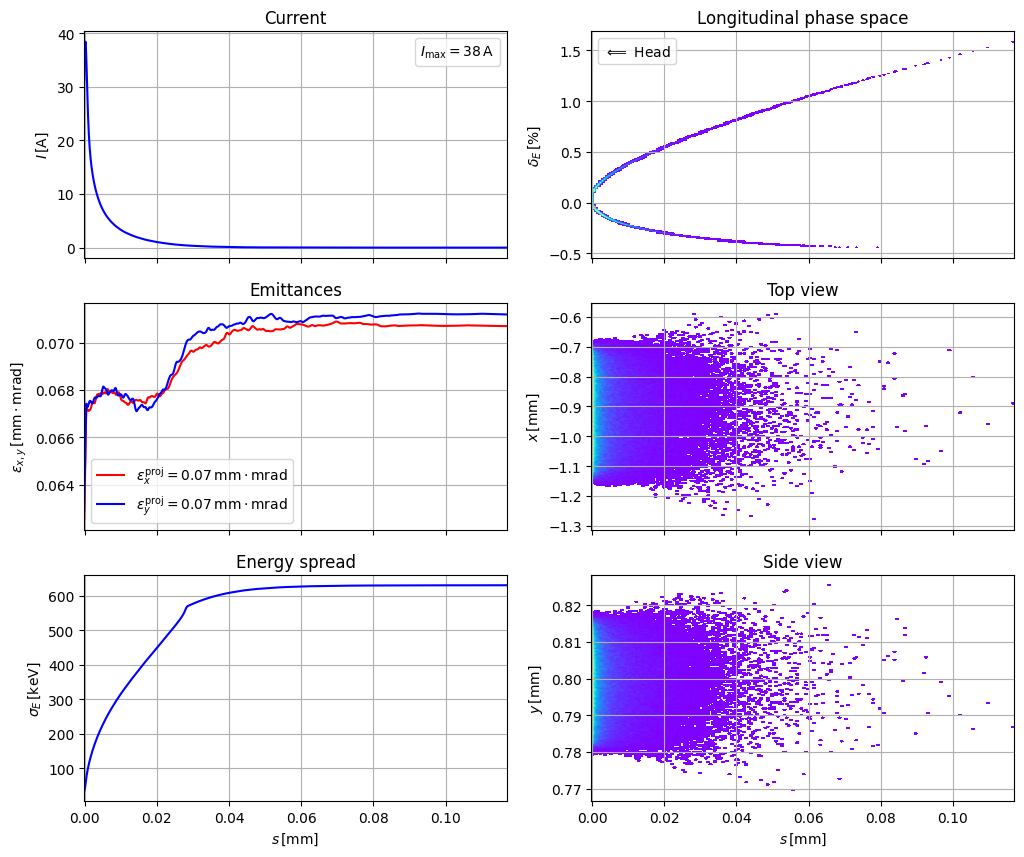

In [7]:
show_e_beam(p_array_out, figsize=(12, 10))
plt.show()

Now generate screen data as well


In [8]:
screen_resolution = (2448, 2040)
meter_per_pixel = (3.5488e-6, 2.5003e-6)
screen_bin_edges = (
    np.linspace(
        -screen_resolution[0] * meter_per_pixel[0] / 2,
        screen_resolution[0] * meter_per_pixel[0] / 2,
        screen_resolution[0] + 1,
    ),
    np.linspace(
        -screen_resolution[1] * meter_per_pixel[1] / 2,
        screen_resolution[1] * meter_per_pixel[1] / 2,
        screen_resolution[1] + 1,
    ),
)

In [9]:
%%timeit
navi = oc.Navigator(lattice)
# navi.unit_step = lattice.totalLen
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi, print_progress=False)
img = np.histogram2d(p_array_out.x(), p_array_out.y(), bins=screen_bin_edges)[0].transpose()
img = np.flipud(img)

176 ms ± 33.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
navi = oc.Navigator(lattice)
navi.unit_step = lattice.totalLen
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi, print_progress=False)
img = np.histogram2d(p_array_out.x(), p_array_out.y(), bins=screen_bin_edges)[0].transpose()
img = np.flipud(img)

214 ms ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


z = 2.0460399999999996 / 2.0460399999999996. Applied:  

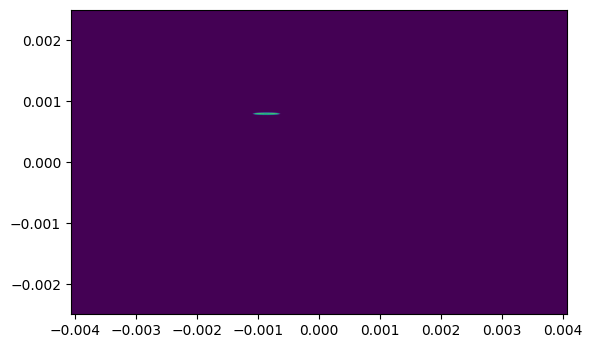

In [11]:
navi = oc.Navigator(lattice)
navi.unit_step = lattice.totalLen
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi)
img = np.histogram2d(p_array_out.x(), p_array_out.y(), bins=screen_bin_edges)[
    0
].transpose()
img = np.flipud(img)

plt.imshow(img, extent=(-0.0040634352, 0.0040634352, -0.002495838, 0.002495838))
plt.show()

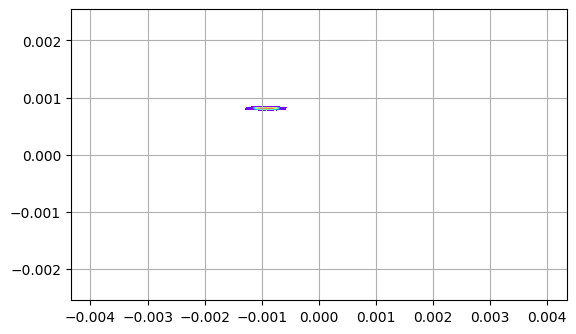

In [12]:
show_density(
    p_array_out.x(),
    p_array_out.y(),
    limits=[
        (
            -screen_resolution[0] * meter_per_pixel[0] / 2,
            screen_resolution[0] * meter_per_pixel[0] / 2,
        ),
        (
            -screen_resolution[1] * meter_per_pixel[1] / 2,
            screen_resolution[1] * meter_per_pixel[1] / 2,
        ),
    ],
)
plt.gca().set_aspect("equal")
plt.show()

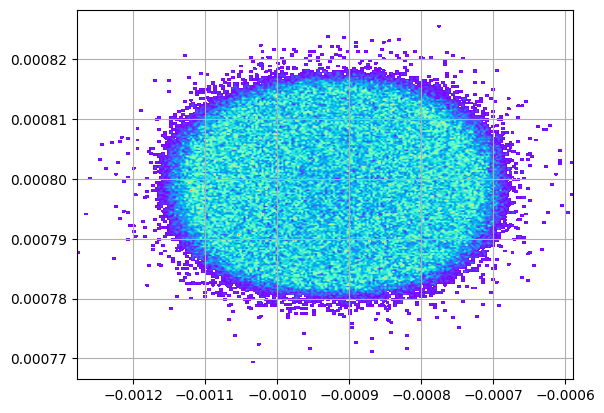

In [13]:
show_density(p_array_out.x(), p_array_out.y())
plt.show()

Add space charge (with and without screen data)


In [14]:
%%timeit
navi = oc.Navigator(lattice)
sc = oc.SpaceCharge()
navi.add_physics_proc(sc, ares.areasola1, ares.areabscr1)
navi.unit_step = 0.02
tws_track, p_array_out = oc.track(
    lattice, deepcopy(p_array), navi, print_progress=False
)

22.1 s ± 604 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%%timeit
navi = oc.Navigator(lattice)
sc = oc.SpaceCharge()
navi.add_physics_proc(sc, ares.areasola1, ares.areabscr1)
navi.unit_step = 0.02
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi, print_progress=False)
img = np.histogram2d(p_array_out.x(), p_array_out.y(), bins=screen_bin_edges)[0].transpose()
img = np.flipud(img)

22.2 s ± 557 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


z = 2.0460399999999996 / 2.0460399999999996. Applied: SpaceChargee

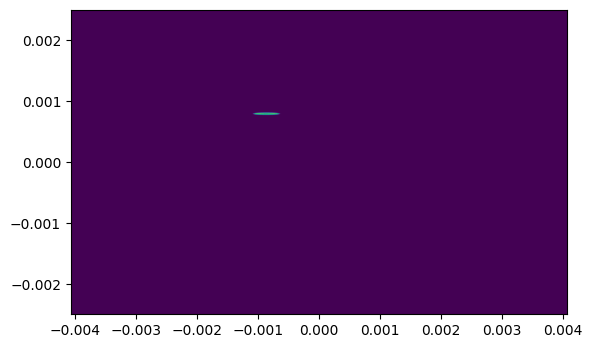

In [16]:
navi = oc.Navigator(lattice)
sc = oc.SpaceCharge()
navi.add_physics_proc(sc, ares.areasola1, ares.areabscr1)
navi.unit_step = 0.02
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi)
img = np.histogram2d(p_array_out.x(), p_array_out.y(), bins=screen_bin_edges)[
    0
].transpose()
img = np.flipud(img)

plt.imshow(img, extent=(-0.0040634352, 0.0040634352, -0.002495838, 0.002495838))
plt.show()

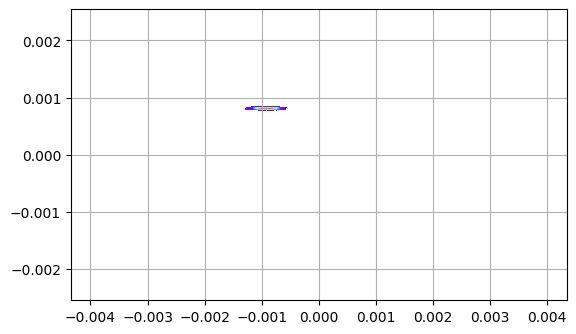

In [17]:
show_density(
    p_array_out.x(),
    p_array_out.y(),
    limits=[
        (
            -screen_resolution[0] * meter_per_pixel[0] / 2,
            screen_resolution[0] * meter_per_pixel[0] / 2,
        ),
        (
            -screen_resolution[1] * meter_per_pixel[1] / 2,
            screen_resolution[1] * meter_per_pixel[1] / 2,
        ),
    ],
)
plt.gca().set_aspect("equal")
plt.show()

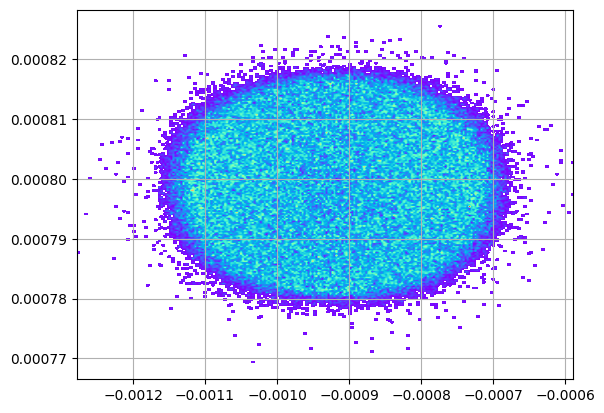

In [18]:
show_density(p_array_out.x(), p_array_out.y())
plt.show()

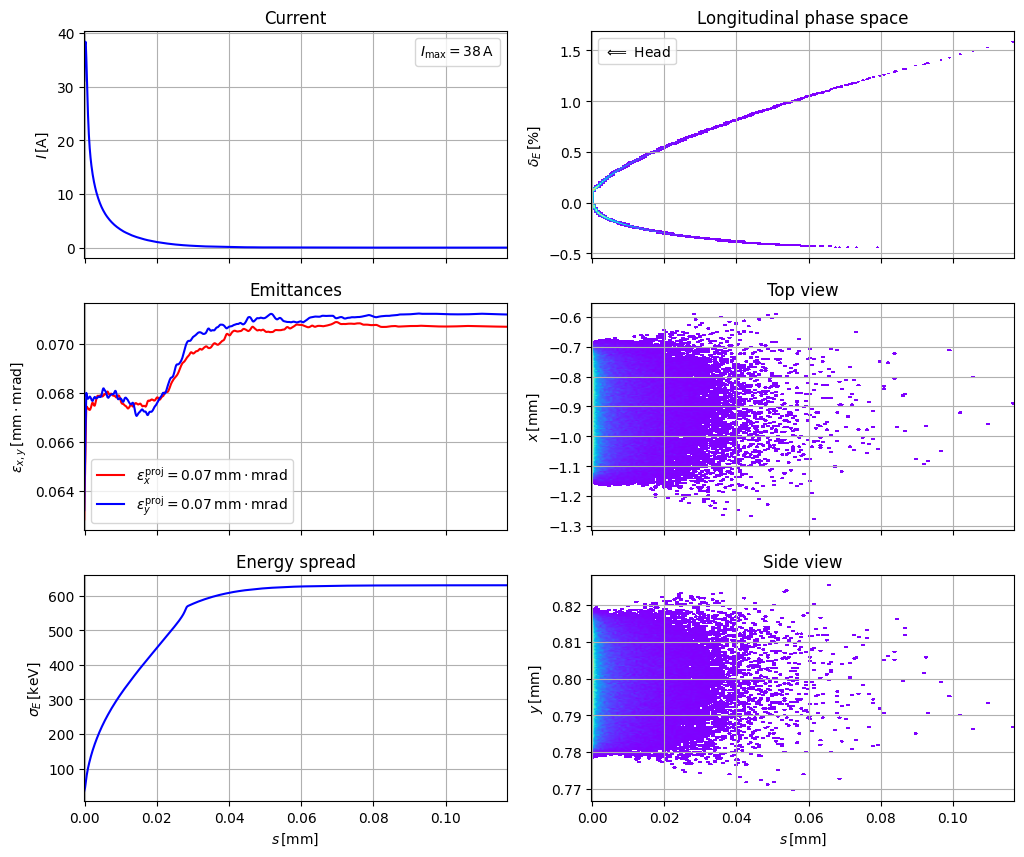

In [19]:
show_e_beam(p_array_out, figsize=(12, 10))
plt.show()